In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster
from sklearn.decomposition import PCA

from scipy.spatial import distance




In [9]:
##LOADING CLEANED DATA

players_2018 = pd.read_csv('players_cleaned.csv')
players_2018 = players_2018.drop(['Unnamed: 0'], axis = 1)
players_2018 = players_2018.fillna(0)

In [10]:
##STANDARDIZE DATA FOR LDA
p_standardized  = pd.DataFrame(StandardScaler().fit_transform(players_2018.select_dtypes(exclude='object')))

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2, solver='eigen', shrinkage='auto' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df)
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']


LDA.score(p_standardized,players_2018['Pos_x'])


0.6145833333333334

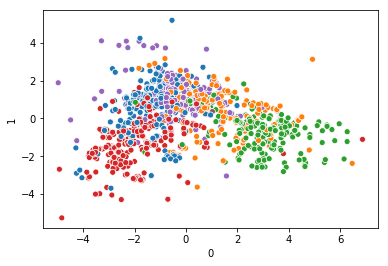

In [20]:
plt.figure()
sns.scatterplot(x=0, y =1, hue ="Pos_x", data = LDA_reduced_df, legend = False )


In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df)
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']


LDA.score(p_standardized,players_2018['Pos_x'])


0.6704545454545454

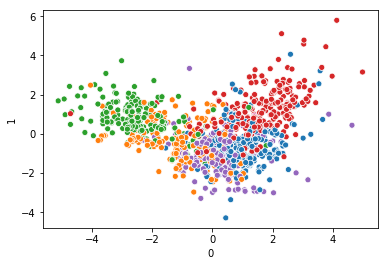

In [23]:
plt.figure()
sns.scatterplot(x=0, y =1, hue ="Pos_x", data = LDA_reduced_df, legend = False )


For n_clusters = 2 The average silhouette_score is : 0.43421388597167015
For n_clusters = 3 The average silhouette_score is : 0.4775952672240521
For n_clusters = 4 The average silhouette_score is : 0.38694618826968075
For n_clusters = 5 The average silhouette_score is : 0.375028455293814
For n_clusters = 6 The average silhouette_score is : 0.3427272346583498
For n_clusters = 7 The average silhouette_score is : 0.34233576909634583
For n_clusters = 8 The average silhouette_score is : 0.33815425753470635
For n_clusters = 9 The average silhouette_score is : 0.3296872126326968


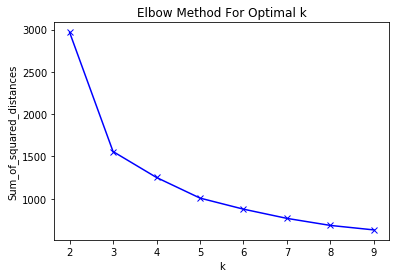

In [24]:
## Number of Cluster Analysis LDA = 2

#DECIDED ON # of Components = 2 to represent 29% of variance
# pca = PCA(n_components = 2)
# principalComponents = pca.fit_transform(x_standardized.select_dtypes(exclude='object'))
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', ])#'principal component 3'])#, 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])
LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df, columns = ['principal component 1', 'principal component 2', ])

Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(LDA_reduced_df)
    Sum_of_squared_distances.append(km.inertia_)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(LDA_reduced_df, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
##CLUSTER ANALYSIS


k = 8
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(LDA_reduced_df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

LDA_reduced_df['Cluster'] = labels
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']
LDA_reduced_df

principal component 1  principal component 2  Cluster  \
0                  0.483899              -1.529279        6   
1                 -0.176822              -1.893052        6   
2                 -2.850465               0.244767        5   
3                 -2.697904               0.933887        1   
4                  0.488886              -1.097125        6   
5                 -2.888002               0.564481        5   
6                 -1.969579               0.572276        5   
7                 -2.754556               0.558972        5   
8                  1.395877               0.994498        4   
9                 -0.512310              -0.081995        3   
10                -1.235904              -2.164113        3   
11                -0.077249              -0.994115        3   
12                -1.233312              -0.065174        5   
13                -1.142764              -1.598974        3   
14                -2.450632               0.473751        5   
15                -1.478246               0.586143        5   
16                -0.156368              -0.695617        3   
17                -0.248494              -1.135875        3   
18                 2.455913              -0.150846        0   
19                -0.235087              -2.770311        6   
20                 1.376817               0.523468        4   
21                 0.335405              -1.105710        6   
22                -2.314475              -0.147814        5   
23                -2.500681              -0.227950        5   
24                -1.872594              -0.036585        5   
25                -2.633218              -0.370349        5   
26                -2.819424              -0.450485        5   
27                -2.191337              -0.259120        5   
28                -1.701073               0.179107        5   
29                -1.887278               0.098971        5   
30                -1.259191               0.290336        5   
31                 1.613338               1.546041        2   
32                 0.141522              -1.485014        6   
33                -0.052427              -1.331754        3   
34                 0.563629              -2.166554        6   
35                 0.116132              -1.697525        6   
36                -0.077817              -1.544265        6   
37                 0.538239              -2.379065        6   
38                -0.159952              -1.376281        3   
39                -0.353901              -1.223021        3   
40                 0.262155              -2.057821        6   
41                 0.170883              -0.592372        3   
42                 1.917898               0.116956        0   
43                 0.758748              -0.657992        0   
44                 1.349198               0.120257        0   
45                 2.503709               3.380000        7   
46                -0.166382              -1.057077        3   
47                 0.420373              -0.710347        0   
48                 0.864710               0.743383        4   
49                 1.108865              -1.599186        6   
...                     ...                    ...      ...   
1006              -1.783931              -1.923010        3   
1007               0.391697              -0.766242        0   
1008              -1.338413               1.738224        5   
1009               0.614909              -0.899160        0   
1010               0.972592              -2.318481        6   
1011               1.751138               0.105818        0   
1012              -1.413612              -1.297105        3   
1013               2.527445              -1.819429        0   
1014              -0.247813              -0.250588        3   
1015               0.267404              -0.281323        3   
1016              -0.328544              -0.416393        3   
1017              -0.521604          

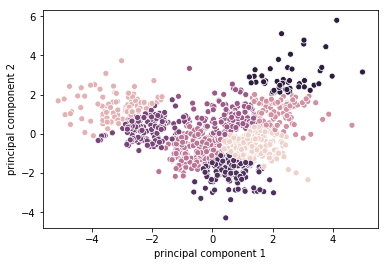

In [27]:
plt.figure()
sns.scatterplot(x='principal component 1', y ='principal component 2', hue ="Cluster", data = LDA_reduced_df, legend = False )
